# **Harry Potter Fanfic and LQBTQ+ acceptance**
Ria Dawar and Michelle Pang

For this project we were interested in researching the potential use of fan fiction as an indicator of LGBTQ+ acceptance in society. We wanted to see whether the popularity of queer relationships in Harry Potter fan fiction be an indicator of a country’s LGBTQ+ acceptance or its attitudes towards queer individuals.

In [11]:
import pandas as pd

## Data Loading

Our first dataset was from Archive of Our Own, a popular fanfiction website. This is in the form of two csv files:
1. **works_df** - contains information about 
- creation date
- language 
- word count 
- restricted or not
- complete or not
- associated tag IDs

2. **tags_df** - contains information about
- tag ID
- tag type
- tag name
- canonical or not
- approximate number of uses
- merger ID

In [20]:
path = "../data/works_ao3.csv"
works_df = pd.read_csv(path)
# tags_df = pd.read_csv("comm2550_S23_Data_Project_G4/data/tags_ao3.csv")

In [19]:
tags_df = pd.read_csv("../data/tags_ao3.csv")

In [21]:
works_df

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN
1,2021-02-26,en,False,True,1638.0,10+20350917+34816907+23666027+23269305+2326930...,NaN
2,2021-02-26,en,False,True,1502.0,10+10613413+9780526+3763877+3741104+7657229+30...,NaN
3,2021-02-26,en,False,True,100.0,10+15322+54862755+20595867+32994286+663+471751...,NaN
4,2021-02-26,en,False,True,994.0,11+721553+54604+1439500+3938423+53483274+54862...,NaN
...,...,...,...,...,...,...,...
7269688,2008-09-13,en,True,True,705.0,78+77+84+101+104+105+106+23+13+16+70+933,NaN
7269689,2008-09-13,en,False,True,1392.0,78+77+84+107+23+10+16+70+933+616,NaN
7269690,2008-09-13,en,False,True,1755.0,77+78+69+108+109+62+110+23+9+111+16+70+10128+4858,NaN
7269691,2008-09-13,en,False,True,1338.0,112+113+13+114+16+115+101+117+118+119+120+116+...,NaN


In [22]:
tags_df

,id,type,name,canonical,cached_count,merger_id
0,1,Media,TV Shows,True,910,NaN
1,2,Media,Movies,True,1164,NaN
2,3,Media,Books & Literature,True,134,NaN
3,4,Media,Cartoons & Comics & Graphic Novels,True,166,NaN
4,5,Media,Anime & Manga,True,501,NaN
...,...,...,...,...,...,...
14467133,55395603,Freeform,Redacted,False,0,NaN
14467134,55395606,Freeform,Redacted,False,0,NaN
14467135,55395609,Freeform,Redacted,False,0,NaN
14467136,55395612,Freeform,Redacted,False,0,NaN


In [23]:
tags_df['type'].unique()

array(['Media', 'Rating', 'ArchiveWarning', 'Category', 'Character',
       'Fandom', 'Relationship', 'Freeform', 'UnsortedTag'], dtype=object)

## Data Analysis

We isolated the tag ID that corresponded to the Harry Potter fandom, to isolate all the fanfiction pieces written in the Harry Potter universe. We specify the tag type to be 'Fandom' and use the tag with the most fics written of it

In [24]:
hp_tags_df = tags_df[(tags_df['type'] == 'Fandom') & (tags_df['name'].str.contains("Harry Potter")) & (tags_df['canonical'] == True)].sort_values(by=['cached_count'], ascending = False).head(2)
hp_tags_df

,id,type,name,canonical,cached_count,merger_id
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
3275208,11055523,Fandom,Harry Potter and the Cursed Child - Thorne & R...,True,3462,NaN


In [25]:
hp_tags = hp_tags_df['id'].values.tolist()

In [26]:
# add an id column
works_df["work_id"] = works_df.index + 1

Then, we define a function to filter for works in the Harry Potter fandom, and apply this function to works_df

In [27]:
def checkHp(x):
  x = str(x)
  if '+' + str(hp_tags[0]) + '+' in x:
    return True
  if x.startswith(str(hp_tags[0]) + '+'):
    return True
  if x.endswith('+' + str(hp_tags[0])):
    return True
  return False

In [28]:
# apply the function above to filter 
hp_df = works_df[works_df['tags'].apply(checkHp)].copy()

We split the tags column into a list of tags. 

In [29]:
hp_df['tags'] = hp_df['tags'].apply(lambda x : str(x).split('+'))

**rel_df** describes the one-to-many relationship between a fic and its tags. For each fic-tag relationship, there is a row in **rel_df** which maps the fic id to the tag id.


In [30]:
rel_df = hp_df[['work_id','tags', 'language']]
rel_df = rel_df.explode('tags')
rel_df['tags'] = pd.to_numeric(rel_df['tags'])

Make a subset of *tags_df* that only contains tag ID, name and type. 

In [31]:
tag_names = tags_df[['id', 'name', 'type']]
tag_names

,id,name,type
0,1,TV Shows,Media
1,2,Movies,Media
2,3,Books & Literature,Media
3,4,Cartoons & Comics & Graphic Novels,Media
4,5,Anime & Manga,Media
...,...,...,...
14467133,55395603,Redacted,Freeform
14467134,55395606,Redacted,Freeform
14467135,55395609,Redacted,Freeform
14467136,55395612,Redacted,Freeform


Then, we merge to find the tag names associated with the id. *work_tag_df* describes the names of all the tags associated with a fanfiction piece. 

In [32]:
work_tag_df = rel_df.merge(tag_names, left_on='tags', right_on='id', how='left')

In [33]:
work_tag_df

,work_id,tags,language,id,name,type
0,31,9,en,9.0,Not Rated,Rating
1,31,136512,en,136512.0,Harry Potter - J. K. Rowling,Fandom
2,31,17106,en,17106.0,Minerva McGonagall/Sybill Trelawney,Relationship
3,31,11235,en,11235.0,none - Character,Character
4,31,572192,en,572192.0,nope - Freeform,Freeform
...,...,...,...,...,...,...
4627708,7268135,3808,en,3808.0,Medium Length,Freeform
4627709,7268135,2099,en,2099.0,Magic,Freeform
4627710,7268135,3815,en,3815.0,Mr and Mrs Granger,Character
4627711,7268135,3914,en,3914.0,icarus - Freeform,Freeform


Then, we filter by works that have relationships, and are not redacted. 

In [34]:
work_tag_df = work_tag_df[(work_tag_df['type'] == 'Relationship') & ~(work_tag_df['name'] == 'Redacted')]
work_tag_df

,work_id,tags,language,id,name,type
2,31,17106,en,17106.0,Minerva McGonagall/Sybill Trelawney,Relationship
9,46,10760,en,10760.0,Hermione Granger/Draco Malfoy,Relationship
24,108,1110,en,1110.0,Sirius Black/Remus Lupin,Relationship
37,148,19506784,en,19506784.0,Lán Zhàn | Lán Wàngjī/Wèi Yīng | Wèi Wúxiàn,Relationship
40,148,25848789,en,25848789.0,Cángsè Sǎnrén/Wèi Chǎngzé,Relationship
...,...,...,...,...,...,...
4627598,7268015,3843,en,3843.0,Harry Potter/Percy Weasley,Relationship
4627617,7268016,3843,en,3843.0,Harry Potter/Percy Weasley,Relationship
4627632,7268023,3869,en,3869.0,Lucius Malfoy/Percy Weasley,Relationship
4627680,7268037,1241,en,1241.0,Harry Potter/Ron Weasley,Relationship


We group by relationships to find the counts of each. 

In [35]:
ship_df = work_tag_df.groupby(['name'])['id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [36]:
ship_df.head(5)

,name,count
6177,Draco Malfoy/Harry Potter,44367
21509,Sirius Black/Remus Lupin,19922
10871,Hermione Granger/Ron Weasley,12716
10553,Hermione Granger/Draco Malfoy,12087
9820,Harry Potter/Severus Snape,11275


Next, we load our other datasets. We have 

In [45]:
chars_df = pd.read_csv("../data/HPCharactersData.csv")
lang_df = pd.read_csv("../data/countries-languages.csv")
langcode_df = pd.read_csv('../data/world-languages-simple.csv')
gai_df = pd.read_csv('../data/GAI-Data-2000-2020.csv')  

We create a set of simple one-word languages names that we can use to filter for valid languages.

In [46]:
s = set(langcode_df['Name'].unique())
s.remove('Chinese (Mandarin)')
s.add('Chinese')

Each country has a comma-separated list of languages spoken there. Some of the languages are listed along with the percentage of the population that uses them. For these languages, we only include them in the result if over 50% of the population uses them.

In [47]:
import re
def filterlang(x):
  languages = x.replace(';', ',').split(',')
  ret = []
  for l in languages:
    if '%' in l:
      percent = re.findall(r'\d+', l)[0]
      if int(percent) > 50:
        for lang in l.split(' '):
          if lang in s:
            ret.append(lang)
    else:
      for lang in l.split(' '):
        if lang in s:
          ret.append(lang)
  return ret

In [48]:
lang_df['Languages'] = lang_df['Languages Spoken'].apply(lambda x: filterlang(x))
lang_df[lang_df['Country'] == 'Denmark']

,Country,Languages Spoken,Languages
46,Denmark,"Danish, Faroese, Greenlandic (Inuit dialect), ...","[Danish, German, English]"


In [49]:
lang_df = lang_df.explode('Languages')

In [50]:
lang_df

,Country,Languages Spoken,Languages
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu...",Persian
1,Albania,"Albanian (Tosk is the official dialect), Greek",Albanian
1,Albania,"Albanian (Tosk is the official dialect), Greek",Greek
2,Algeria,"Arabic (official), French, Berber dialects",Arabic
2,Algeria,"Arabic (official), French, Berber dialects",French
...,...,...,...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic",Arabic
195,Yemen,Arabic,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ...",English
196,Zambia,"English (official); major vernaculars: Bemba, ...",Tonga


We merge our dataframe which maps countries to languages with the language code dataframe and group by language code to get lists of countries.

In [51]:
lang_combined = lang_df.merge(langcode_df, left_on='Languages', right_on='Name', how='left')
lang_combined['lang_Code'] = lang_combined['Code'].apply(lambda x: str(x).lower())
lang_country = lang_combined[['lang_Code', 'Country']]
lang_country = lang_country.groupby('lang_Code').agg({"Country": lambda x: list(x)})
lang_country

,Country
lang_Code,
af,[Namibia]
ar,"[Algeria, Bahrain, Chad, Comoros, Djibouti, Eg..."
bg,[Bulgaria]
bn,[India]
bo,[Bhutan]
...,...
uk,[Ukraine]
ur,"[Bahrain, Guyana, India, Oman, United Arab Emi..."
uz,[Uzbekistan]


We have a dataframe of LGBT global acceptance index (GAI) for each country. We merge this with our country and language dataframe.

In [52]:
GAI_lang_df = lang_combined[['lang_Code', 'Country']].merge(gai_df[['Country', 'GAI']], on='Country', how='left').groupby('lang_Code').agg({"Country": lambda x: list(x), 'GAI': 'mean'})

Next, we handle some special cases of character names.

In [53]:
chars_df.loc[chars_df['Name'] == 'Lily Potter', 'Name'] = 'Lily Evans Potter'

In [54]:
df2 = {'Name': 'Tom Riddle', 'Gender': 'Male', 'Species/Race': 'wizard', 'Blood': 'Half-blood'}
chars_df = chars_df.append(df2, ignore_index = True)

/tmp/ipykernel_2191219/3205639399.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chars_df = chars_df.append(df2, ignore_index = True)


In [55]:
chars_df.loc[chars_df['Name'] == 'Lord Voldemort', 'Name'] = 'Voldemort'

In [56]:
df2 = {'Name': 'Narcissa Black Malfoy', 'Gender': 'Female', 'Species/Race': 'witch', 'Blood': 'Pure blood'}
chars_df = chars_df.append(df2, ignore_index = True)

/tmp/ipykernel_2191219/3992164409.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chars_df = chars_df.append(df2, ignore_index = True)


The ships are in three formats: char1/char2, char1|char2, or char1 & char2. We split on these delimiters and merge the result with our table of characters and genders.

In [57]:
import re

ship_type = pd.DataFrame({'ship':work_tag_df['name'], 'chars': work_tag_df['name'].apply(lambda x: re.split(r'/| & ', str(x)))})
ship_type = ship_type.drop_duplicates('ship')
ship_type = ship_type.explode('chars').merge(chars_df, left_on='chars', right_on='Name', how='left')[['ship', 'chars', 'Gender']]
ship_type.groupby('ship').agg({"chars": lambda x: list(x),"Gender": lambda x: list(x)})
ship_type = ship_type.dropna()

In [58]:
x = 'Minerva McGonagall & Sybill Trelawney'
re.split(r'/| & ', x)

['Minerva McGonagall', 'Sybill Trelawney']

In [59]:
ship_type = ship_type.groupby('ship')['Gender'].apply(list).reset_index(name='type')
ship_type = ship_type[ship_type.apply(lambda x: True if (len(x['type'])) > 1 else False,axis=1)]
ship_type

,ship,type
4,Aberforth Dumbledore & Albus Dumbledore,"[Male, Male]"
5,Aberforth Dumbledore & Albus Dumbledore & Aria...,"[Male, Male, Female]"
6,Aberforth Dumbledore & Albus Dumbledore & Aria...,"[Male, Male, Female, Male]"
7,Aberforth Dumbledore & Ariana Dumbledore,"[Male, Female]"
8,Aberforth Dumbledore & Gellert Grindelwald,"[Male, Male]"
...,...,...
10448,Zacharias Smith/Blaise Zabini,"[Male, Male]"
10450,Zacharias Smith/Fred Weasley/George Weasley,"[Male, Male, Male]"
10451,Zacharias Smith/Ginny Weasley,"[Male, Female]"
10452,Zacharias Smith/Lucy Weasley,"[Male, Female]"


In [60]:
#top_5_country_df takes the five most popular ships for each language
work_country_df = work_tag_df.groupby(['language','name'])['work_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)
top_5_country_df = work_country_df.groupby(['language']).head(5)
top_5_country_df = top_5_country_df.merge(ship_type, left_on='name', right_on='ship', how='left').drop(['ship'], axis=1)

In [61]:
top_country_df = work_country_df.merge(ship_type, left_on='name', right_on='ship', how='left').drop(['ship'], axis=1).dropna()
top_country_df = top_country_df.merge(GAI_lang_df, left_on='language', right_on='lang_Code')

In [62]:
def convert(x):
  if type(x) is list:
    if 'Female' in x and 'Male' in x:
      return 1
  return 0

In [63]:
top_country_df['gay'] = top_country_df.apply(lambda x: convert(x['type'])* x['count'], axis=1)

In [64]:
# gay_rating will be our Gay Acceptance Index
top_country_df = top_country_df[['language', 'GAI', 'Country', 'count', 'gay']].groupby(['language', 'GAI']).agg({'count': 'sum', 'Country': 'first', 'gay': 'sum' }).reset_index(names=['language', 'GAI'])
top_country_df['gay_rating'] = top_country_df.apply(lambda x: x['gay'] / x['count'], axis=1)

In [65]:
top_country_df

,language,GAI,count,Country,gay,gay_rating
0,ar,3.438333,1,"[Algeria, Bahrain, Chad, Comoros, Djibouti, Eg...",0,0.000000
1,bg,4.190000,5,[Bulgaria],2,0.400000
2,ca,7.730000,1,[France],0,0.000000
3,cs,5.460000,334,"[Croatia, Czech Republic]",97,0.290419
4,cy,8.340000,4,[United Kingdom],0,0.000000
5,da,8.690000,2,[Denmark],2,1.000000
6,de,7.548750,1277,"[Argentina, Austria, Denmark, Germany, Iceland...",546,0.427565
7,el,4.416667,3,"[Albania, Cyprus, Greece]",0,0.000000
8,en,4.718548,254357,"[Antigua and Barbuda, Argentina, Australia, Ba...",114349,0.449561
9,es,5.836364,5425,"[Argentina, Belize, Bolivia, Brazil, Chile, Co...",1710,0.315207


Then, we find the correlation between these columns and represent it as a heatmap. 

/tmp/ipykernel_2191219/722160116.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top_country_df.corr(), annot = True)


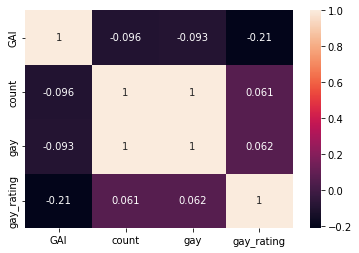

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(top_country_df.corr(), annot = True)
plt.show()

In [67]:
df_test = top_country_df[top_country_df.apply(lambda x: len(x['Country']) < 2, axis=1)]
df_test = df_test.drop(columns = {'gay', 'count'})
df_test

,language,GAI,Country,gay_rating
1,bg,4.19,[Bulgaria],0.400000
2,ca,7.73,[France],0.000000
4,cy,8.34,[United Kingdom],0.000000
5,da,8.69,[Denmark],1.000000
10,et,5.25,[Estonia],1.000000
11,fi,7.96,[Finland],0.221790
13,ga,8.41,[Ireland],0.277778
19,lv,4.42,[Latvia],1.000000
25,sv,9.18,[Sweden],0.000000
28,uk,2.91,[Ukraine],0.727273


In [68]:
corr_top_country = df_test.corr()
corr_top_country

/tmp/ipykernel_2191219/1745600460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_top_country = df_test.corr()


,GAI,gay_rating
GAI,1.000000,-0.474986
gay_rating,-0.474986,1.000000


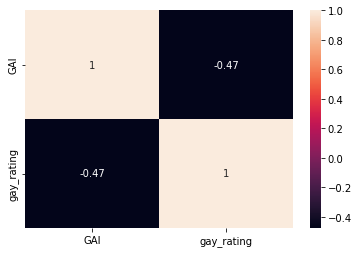

In [69]:
sns.heatmap(corr_top_country, annot = True)
plt.show()

In [70]:
top_country_df[top_country_df.apply(lambda x: len(x['Country']) < 15, axis=1)].corr()

/tmp/ipykernel_2191219/3143493810.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_country_df[top_country_df.apply(lambda x: len(x['Country']) < 15, axis=1)].corr()


,GAI,count,gay,gay_rating
GAI,1.000000,-0.328009,-0.319372,-0.259632
count,-0.328009,1.000000,0.986625,-0.013089
gay,-0.319372,0.986625,1.000000,0.024279
gay_rating,-0.259632,-0.013089,0.024279,1.000000


In [71]:
top_5_country_df

,language,name,count,type
0,en,Draco Malfoy/Harry Potter,39138,"[Male, Male]"
1,en,Sirius Black/Remus Lupin,18631,"[Male, Male]"
2,en,Hermione Granger/Ron Weasley,11836,"[Female, Male]"
3,en,Hermione Granger/Draco Malfoy,11358,"[Female, Male]"
4,en,James Potter/Lily Evans Potter,9768,"[Male, Female]"
...,...,...,...,...
146,bg,Pansy Parkinson/Fred Weasley/George Weasley/Bl...,1,"[Female, Male, Male, Male]"
147,bg,OFC/OMC,1,NaN
148,bg,Neville Longbottom/Luna Lovegood,1,"[Male, Female]"
149,da,Hermione Granger/Lucius Malfoy,1,"[Female, Male]"


## Exploratory Data Analysis

First, we found the most popular languages that fanfiction pieces were written in. 

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
lang_frequency_df = work_country_df.groupby(['language']).count()
lang_frequency_df = lang_frequency_df.drop(columns = 'name')
lang_frequency_df = lang_frequency_df.reset_index()
lang_frequency_df = lang_frequency_df.sort_values(by = 'count', ascending = False)
lang_frequency_df.head(10)

,language,count
9,en,22976
13,fr,1507
10,es,1444
31,ru,1385
39,zh,765
19,it,603
26,pl,522
7,de,497
27,ptBR,472
12,fi,213


We plotted the most popular languages that fanfiction was written in using a pie chart, and a bar chart. 

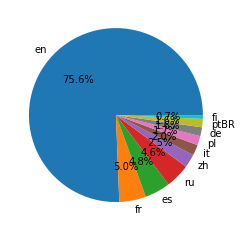

In [73]:
# plt.pie(data = lang_frequency_df, x = 'count')
plt.pie(lang_frequency_df.head(10)['count'], labels=lang_frequency_df.head(10)['language'], autopct='%1.1f%%')
plt.show()

<Axes: xlabel='language', ylabel='count'>

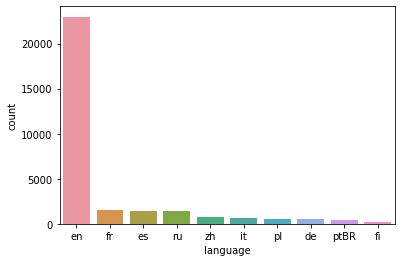

In [75]:
sns.set_palette('husl')
sns.barplot(data = lang_frequency_df.head(10), x = 'language', y = 'count')
# plt.savefig('/language_freq_plot.png')

We also wanted to find the top 5 relationship pairings by specific languages, such as in English

In [76]:
top_5_country_df = top_5_country_df.merge(lang_country, left_on='language', right_on='lang_Code')

In [77]:
top_5_country_df[top_5_country_df['language'].isin(['en'])]

,language,name,count,type,Country
0,en,Draco Malfoy/Harry Potter,39138,"[Male, Male]","[Antigua and Barbuda, Argentina, Australia, Ba..."
1,en,Sirius Black/Remus Lupin,18631,"[Male, Male]","[Antigua and Barbuda, Argentina, Australia, Ba..."
2,en,Hermione Granger/Ron Weasley,11836,"[Female, Male]","[Antigua and Barbuda, Argentina, Australia, Ba..."
3,en,Hermione Granger/Draco Malfoy,11358,"[Female, Male]","[Antigua and Barbuda, Argentina, Australia, Ba..."
4,en,James Potter/Lily Evans Potter,9768,"[Male, Female]","[Antigua and Barbuda, Argentina, Australia, Ba..."


We also looked for the top 5 relationship pairings in all languages except English. 

In [78]:
top_5_country_df[~top_5_country_df['language'].isin(['en'])]

,language,name,count,type,Country
5,es,Draco Malfoy/Harry Potter,1364,"[Male, Male]","[Argentina, Belize, Bolivia, Brazil, Chile, Co..."
6,es,Sirius Black/Remus Lupin,357,"[Male, Male]","[Argentina, Belize, Bolivia, Brazil, Chile, Co..."
7,es,Harry Potter/Severus Snape,281,"[Male, Male]","[Argentina, Belize, Bolivia, Brazil, Chile, Co..."
8,es,Harry Potter/Tom Riddle,199,"[Male, Male]","[Argentina, Belize, Bolivia, Brazil, Chile, Co..."
9,es,Hermione Granger/Ron Weasley,181,"[Female, Male]","[Argentina, Belize, Bolivia, Brazil, Chile, Co..."
...,...,...,...,...,...
121,bg,Pansy Parkinson/Fred Weasley/George Weasley/Bl...,1,"[Female, Male, Male, Male]",[Bulgaria]
122,bg,OFC/OMC,1,NaN,[Bulgaria]
123,bg,Neville Longbottom/Luna Lovegood,1,"[Male, Female]",[Bulgaria]
124,da,Hermione Granger/Lucius Malfoy,1,"[Female, Male]",[Denmark]


We also explored this for the French language. 

In [79]:
top_5_country_df[top_5_country_df['language'].isin(['fr'])]

,language,name,count,type,Country
15,fr,Draco Malfoy/Harry Potter,375,"[Male, Male]","[Algeria, Andorra, Argentina, Benin, Brazil, B..."
16,fr,Sirius Black/Remus Lupin,132,"[Male, Male]","[Algeria, Andorra, Argentina, Benin, Brazil, B..."
17,fr,Hermione Granger/Ron Weasley,107,"[Female, Male]","[Algeria, Andorra, Argentina, Benin, Brazil, B..."
18,fr,Hermione Granger/Draco Malfoy,89,"[Female, Male]","[Algeria, Andorra, Argentina, Benin, Brazil, B..."
19,fr,Harry Potter/Ginny Weasley,76,"[Male, Female]","[Algeria, Andorra, Argentina, Benin, Brazil, B..."


In [80]:
pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', None)

In [81]:
top_5_country_df[top_5_country_df.apply(lambda x: len(x['Country']) < 15, axis=1)]

,language,name,count,type,Country
10,ru,Draco Malfoy/Harry Potter,1050,"[Male, Male]","[Armenia, Belarus, Kazakhstan, Kyrgyzstan, Mol..."
11,ru,Harry Potter/Severus Snape,747,"[Male, Male]","[Armenia, Belarus, Kazakhstan, Kyrgyzstan, Mol..."
12,ru,Albus Dumbledore/Gellert Grindelwald,172,"[Male, Male]","[Armenia, Belarus, Kazakhstan, Kyrgyzstan, Mol..."
13,ru,Hermione Granger/Ron Weasley,163,"[Female, Male]","[Armenia, Belarus, Kazakhstan, Kyrgyzstan, Mol..."
14,ru,Hermione Granger/Draco Malfoy,147,"[Female, Male]","[Armenia, Belarus, Kazakhstan, Kyrgyzstan, Mol..."
...,...,...,...,...,...
121,bg,Pansy Parkinson/Fred Weasley/George Weasley/Bl...,1,"[Female, Male, Male, Male]",[Bulgaria]
122,bg,OFC/OMC,1,NaN,[Bulgaria]
123,bg,Neville Longbottom/Luna Lovegood,1,"[Male, Female]",[Bulgaria]
124,da,Hermione Granger/Lucius Malfoy,1,"[Female, Male]",[Denmark]
